In [ ]:
# Check TensorFlow, GPU, set seeds for reproducibility
import os, random, numpy as np, tensorflow as tf
print("TF version:", tf.__version__)

# Seed
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# GPU check (in Colab: Runtime > Change runtime type > GPU)
gpus = tf.config.list_physical_devices('GPU')
print("GPUs found:", gpus)


TF version: 2.19.0
GPUs found: []


In [ ]:
# Check TensorFlow, GPU, set seeds for reproducibility
import os, random, numpy as np, tensorflow as tf
print("TF version:", tf.__version__)

# Seed
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# GPU check (in Colab: Runtime > Change runtime type > GPU)
gpus = tf.config.list_physical_devices('GPU')
print("GPUs found:", gpus)


TF version: 2.19.0
GPUs found: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# MNIST: 28x28 grayscale 10-class digits
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [ ]:
# Flatten 28x28 -> 784 for feedforward NN and normalize to [0,1]
num_pixels = 28 * 28
x_train_flat = x_train.reshape(-1, num_pixels).astype('float32') / 255.0
x_test_flat  = x_test.reshape(-1, num_pixels).astype('float32') / 255.0

# One-hot labels
from tensorflow.keras.utils import to_categorical
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

print("x_train_flat shape:", x_train_flat.shape, "y_train_cat shape:", y_train_cat.shape)


x_train_flat shape: (60000, 784) y_train_cat shape: (60000, 10)


In [ ]:
from tensorflow.keras import layers, models, regularizers

def build_baseline(input_dim=784, hidden_units=128, num_classes=10, l2_rate=0.0, dropout_rate=0.0):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(hidden_units, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_rate)),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_baseline(hidden_units=256, l2_rate=1e-4, dropout_rate=0.2)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_baseline.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

history = model.fit(x_train_flat, y_train_cat,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=callbacks,
                    verbose=2)


Epoch 1/50

Epoch 1: val_loss improved from inf to 0.17667, saving model to best_baseline.h5


422/422 - 6s - 14ms/step - accuracy: 0.9003 - loss: 0.3869 - val_accuracy: 0.9617 - val_loss: 0.1767 - learning_rate: 1.0000e-03
Epoch 2/50

Epoch 2: val_loss improved from 0.17667 to 0.14052, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9516 - loss: 0.1974 - val_accuracy: 0.9688 - val_loss: 0.1405 - learning_rate: 1.0000e-03
Epoch 3/50

Epoch 3: val_loss improved from 0.14052 to 0.12429, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9646 - loss: 0.1554 - val_accuracy: 0.9758 - val_loss: 0.1243 - learning_rate: 1.0000e-03
Epoch 4/50

Epoch 4: val_loss improved from 0.12429 to 0.11370, saving model to best_baseline.h5


422/422 - 1s - 4ms/step - accuracy: 0.9711 - loss: 0.1345 - val_accuracy: 0.9788 - val_loss: 0.1137 - learning_rate: 1.0000e-03
Epoch 5/50

Epoch 5: val_loss improved from 0.11370 to 0.10853, saving model to best_baseline.h5


422/422 - 2s - 4ms/step - accuracy: 0.9752 - loss: 0.1194 - val_accuracy: 0.9800 - val_loss: 0.1085 - learning_rate: 1.0000e-03
Epoch 6/50

Epoch 6: val_loss improved from 0.10853 to 0.10638, saving model to best_baseline.h5


422/422 - 2s - 4ms/step - accuracy: 0.9782 - loss: 0.1094 - val_accuracy: 0.9810 - val_loss: 0.1064 - learning_rate: 1.0000e-03
Epoch 7/50

Epoch 7: val_loss improved from 0.10638 to 0.10363, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9816 - loss: 0.1007 - val_accuracy: 0.9808 - val_loss: 0.1036 - learning_rate: 1.0000e-03
Epoch 8/50

Epoch 8: val_loss improved from 0.10363 to 0.10323, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9831 - loss: 0.0949 - val_accuracy: 0.9815 - val_loss: 0.1032 - learning_rate: 1.0000e-03
Epoch 9/50

Epoch 9: val_loss improved from 0.10323 to 0.10280, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9839 - loss: 0.0904 - val_accuracy: 0.9808 - val_loss: 0.1028 - learning_rate: 1.0000e-03
Epoch 10/50

Epoch 10: val_loss improved from 0.10280 to 0.09707, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9854 - loss: 0.0857 - val_accuracy: 0.9833 - val_loss: 0.0971 - learning_rate: 1.0000e-03
Epoch 11/50

Epoch 11: val_loss did not improve from 0.09707
422/422 - 1s - 3ms/step - accuracy: 0.9870 - loss: 0.0828 - val_accuracy: 0.9810 - val_loss: 0.1018 - learning_rate: 1.0000e-03
Epoch 12/50

Epoch 12: val_loss did not improve from 0.09707
422/422 - 1s - 3ms/step - accuracy: 0.9871 - loss: 0.0801 - val_accuracy: 0.9808 - val_loss: 0.1000 - learning_rate: 1.0000e-03
Epoch 13/50

Epoch 13: val_loss did not improve from 0.09707

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
422/422 - 2s - 4ms/step - accuracy: 0.9873 - loss: 0.0779 - val_accuracy: 0.9815 - val_loss: 0.1012 - learning_rate: 1.0000e-03
Epoch 14/50

Epoch 14: val_loss improved from 0.09707 to 0.09027, saving model to best_baseline.h5


422/422 - 1s - 4ms/step - accuracy: 0.9914 - loss: 0.0676 - val_accuracy: 0.9840 - val_loss: 0.0903 - learning_rate: 5.0000e-04
Epoch 15/50

Epoch 15: val_loss improved from 0.09027 to 0.08729, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9922 - loss: 0.0629 - val_accuracy: 0.9850 - val_loss: 0.0873 - learning_rate: 5.0000e-04
Epoch 16/50

Epoch 16: val_loss improved from 0.08729 to 0.08523, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9928 - loss: 0.0608 - val_accuracy: 0.9848 - val_loss: 0.0852 - learning_rate: 5.0000e-04
Epoch 17/50

Epoch 17: val_loss improved from 0.08523 to 0.08227, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9930 - loss: 0.0592 - val_accuracy: 0.9855 - val_loss: 0.0823 - learning_rate: 5.0000e-04
Epoch 18/50

Epoch 18: val_loss did not improve from 0.08227
422/422 - 1s - 3ms/step - accuracy: 0.9930 - loss: 0.0582 - val_accuracy: 0.9848 - val_loss: 0.0866 - learning_rate: 5.0000e-04
Epoch 19/50

Epoch 19: val_loss did not improve from 0.08227
422/422 - 1s - 3ms/step - accuracy: 0.9936 - loss: 0.0564 - val_accuracy: 0.9848 - val_loss: 0.0836 - learning_rate: 5.0000e-04
Epoch 20/50

Epoch 20: val_loss did not improve from 0.08227

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
422/422 - 1s - 3ms/step - accuracy: 0.9932 - loss: 0.0555 - val_accuracy: 0.9837 - val_loss: 0.0839 - learning_rate: 5.0000e-04
Epoch 21/50

Epoch 21: val_loss improved from 0.08227 to 0.07931, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9947 - loss: 0.0515 - val_accuracy: 0.9857 - val_loss: 0.0793 - learning_rate: 2.5000e-04
Epoch 22/50

Epoch 22: val_loss improved from 0.07931 to 0.07853, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9954 - loss: 0.0495 - val_accuracy: 0.9858 - val_loss: 0.0785 - learning_rate: 2.5000e-04
Epoch 23/50

Epoch 23: val_loss did not improve from 0.07853
422/422 - 2s - 4ms/step - accuracy: 0.9957 - loss: 0.0475 - val_accuracy: 0.9858 - val_loss: 0.0793 - learning_rate: 2.5000e-04
Epoch 24/50

Epoch 24: val_loss improved from 0.07853 to 0.07737, saving model to best_baseline.h5


422/422 - 2s - 5ms/step - accuracy: 0.9958 - loss: 0.0471 - val_accuracy: 0.9860 - val_loss: 0.0774 - learning_rate: 2.5000e-04
Epoch 25/50

Epoch 25: val_loss did not improve from 0.07737
422/422 - 1s - 3ms/step - accuracy: 0.9958 - loss: 0.0462 - val_accuracy: 0.9857 - val_loss: 0.0790 - learning_rate: 2.5000e-04
Epoch 26/50

Epoch 26: val_loss did not improve from 0.07737
422/422 - 1s - 2ms/step - accuracy: 0.9959 - loss: 0.0453 - val_accuracy: 0.9858 - val_loss: 0.0776 - learning_rate: 2.5000e-04
Epoch 27/50

Epoch 27: val_loss did not improve from 0.07737

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
422/422 - 1s - 3ms/step - accuracy: 0.9961 - loss: 0.0446 - val_accuracy: 0.9858 - val_loss: 0.0774 - learning_rate: 2.5000e-04
Epoch 28/50

Epoch 28: val_loss improved from 0.07737 to 0.07585, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9971 - loss: 0.0419 - val_accuracy: 0.9857 - val_loss: 0.0758 - learning_rate: 1.2500e-04
Epoch 29/50

Epoch 29: val_loss improved from 0.07585 to 0.07528, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9967 - loss: 0.0416 - val_accuracy: 0.9858 - val_loss: 0.0753 - learning_rate: 1.2500e-04
Epoch 30/50

Epoch 30: val_loss improved from 0.07528 to 0.07484, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9970 - loss: 0.0411 - val_accuracy: 0.9857 - val_loss: 0.0748 - learning_rate: 1.2500e-04
Epoch 31/50

Epoch 31: val_loss improved from 0.07484 to 0.07322, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9972 - loss: 0.0403 - val_accuracy: 0.9863 - val_loss: 0.0732 - learning_rate: 1.2500e-04
Epoch 32/50

Epoch 32: val_loss did not improve from 0.07322
422/422 - 1s - 3ms/step - accuracy: 0.9971 - loss: 0.0398 - val_accuracy: 0.9855 - val_loss: 0.0743 - learning_rate: 1.2500e-04
Epoch 33/50

Epoch 33: val_loss improved from 0.07322 to 0.07217, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9970 - loss: 0.0402 - val_accuracy: 0.9865 - val_loss: 0.0722 - learning_rate: 1.2500e-04
Epoch 34/50

Epoch 34: val_loss improved from 0.07217 to 0.07142, saving model to best_baseline.h5


422/422 - 2s - 5ms/step - accuracy: 0.9971 - loss: 0.0397 - val_accuracy: 0.9867 - val_loss: 0.0714 - learning_rate: 1.2500e-04
Epoch 35/50

Epoch 35: val_loss did not improve from 0.07142
422/422 - 1s - 3ms/step - accuracy: 0.9971 - loss: 0.0392 - val_accuracy: 0.9868 - val_loss: 0.0723 - learning_rate: 1.2500e-04
Epoch 36/50

Epoch 36: val_loss did not improve from 0.07142
422/422 - 1s - 3ms/step - accuracy: 0.9969 - loss: 0.0391 - val_accuracy: 0.9853 - val_loss: 0.0727 - learning_rate: 1.2500e-04
Epoch 37/50

Epoch 37: val_loss did not improve from 0.07142

Epoch 37: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
422/422 - 1s - 3ms/step - accuracy: 0.9970 - loss: 0.0386 - val_accuracy: 0.9862 - val_loss: 0.0723 - learning_rate: 1.2500e-04
Epoch 38/50

Epoch 38: val_loss improved from 0.07142 to 0.07133, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9977 - loss: 0.0372 - val_accuracy: 0.9865 - val_loss: 0.0713 - learning_rate: 6.2500e-05
Epoch 39/50

Epoch 39: val_loss improved from 0.07133 to 0.07114, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9974 - loss: 0.0374 - val_accuracy: 0.9860 - val_loss: 0.0711 - learning_rate: 6.2500e-05
Epoch 40/50

Epoch 40: val_loss improved from 0.07114 to 0.07082, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9976 - loss: 0.0368 - val_accuracy: 0.9862 - val_loss: 0.0708 - learning_rate: 6.2500e-05
Epoch 41/50

Epoch 41: val_loss did not improve from 0.07082
422/422 - 2s - 4ms/step - accuracy: 0.9972 - loss: 0.0371 - val_accuracy: 0.9863 - val_loss: 0.0709 - learning_rate: 6.2500e-05
Epoch 42/50

Epoch 42: val_loss did not improve from 0.07082
422/422 - 1s - 3ms/step - accuracy: 0.9978 - loss: 0.0360 - val_accuracy: 0.9858 - val_loss: 0.0711 - learning_rate: 6.2500e-05
Epoch 43/50

Epoch 43: val_loss improved from 0.07082 to 0.07054, saving model to best_baseline.h5


422/422 - 2s - 5ms/step - accuracy: 0.9978 - loss: 0.0358 - val_accuracy: 0.9863 - val_loss: 0.0705 - learning_rate: 6.2500e-05
Epoch 44/50

Epoch 44: val_loss improved from 0.07054 to 0.07040, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9975 - loss: 0.0359 - val_accuracy: 0.9858 - val_loss: 0.0704 - learning_rate: 6.2500e-05
Epoch 45/50

Epoch 45: val_loss did not improve from 0.07040
422/422 - 1s - 3ms/step - accuracy: 0.9977 - loss: 0.0357 - val_accuracy: 0.9860 - val_loss: 0.0707 - learning_rate: 6.2500e-05
Epoch 46/50

Epoch 46: val_loss improved from 0.07040 to 0.07020, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9981 - loss: 0.0355 - val_accuracy: 0.9862 - val_loss: 0.0702 - learning_rate: 6.2500e-05
Epoch 47/50

Epoch 47: val_loss improved from 0.07020 to 0.06969, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9978 - loss: 0.0353 - val_accuracy: 0.9867 - val_loss: 0.0697 - learning_rate: 6.2500e-05
Epoch 48/50

Epoch 48: val_loss improved from 0.06969 to 0.06951, saving model to best_baseline.h5


422/422 - 1s - 3ms/step - accuracy: 0.9977 - loss: 0.0353 - val_accuracy: 0.9862 - val_loss: 0.0695 - learning_rate: 6.2500e-05
Epoch 49/50

Epoch 49: val_loss did not improve from 0.06951
422/422 - 1s - 3ms/step - accuracy: 0.9979 - loss: 0.0351 - val_accuracy: 0.9858 - val_loss: 0.0697 - learning_rate: 6.2500e-05
Epoch 50/50

Epoch 50: val_loss did not improve from 0.06951
422/422 - 2s - 4ms/step - accuracy: 0.9977 - loss: 0.0350 - val_accuracy: 0.9862 - val_loss: 0.0702 - learning_rate: 6.2500e-05
Restoring model weights from the end of the best epoch: 48.


313/313 - 2s - 6ms/step - accuracy: 0.9847 - loss: 0.0703
Test loss: 0.0703   Test accuracy: 0.9847


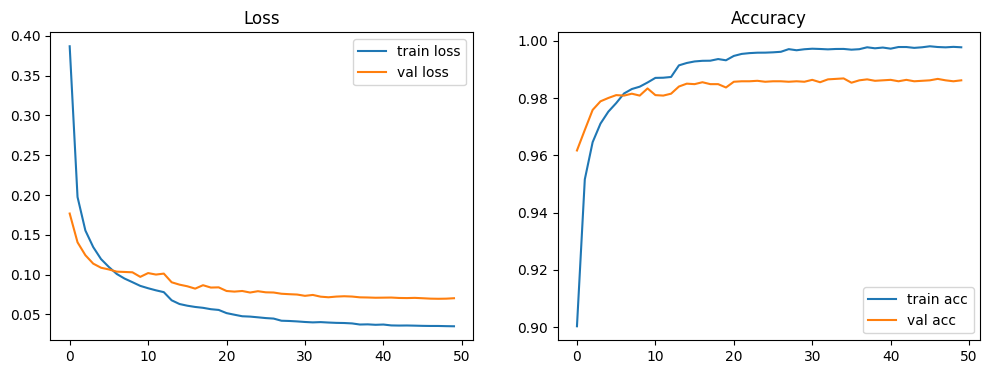

In [ ]:
import matplotlib.pyplot as plt

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=2)
print(f"Test loss: {test_loss:.4f}   Test accuracy: {test_acc:.4f}")

# Plot loss & accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title('Accuracy')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



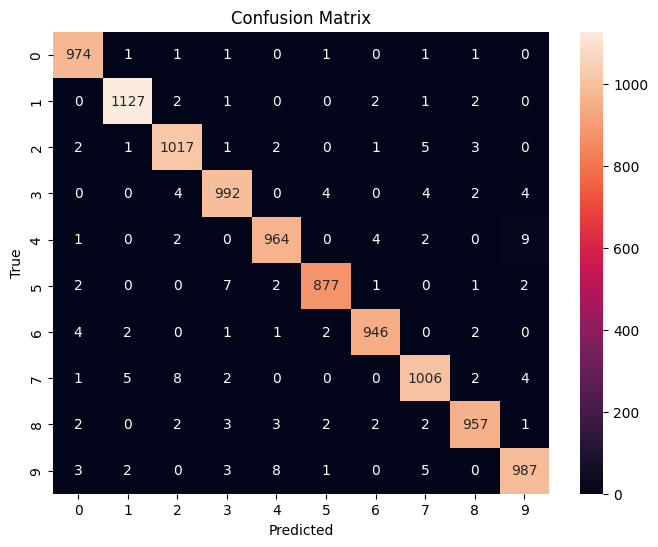

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_probs = model.predict(x_test_flat)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.show()


Number of misclassified: 153


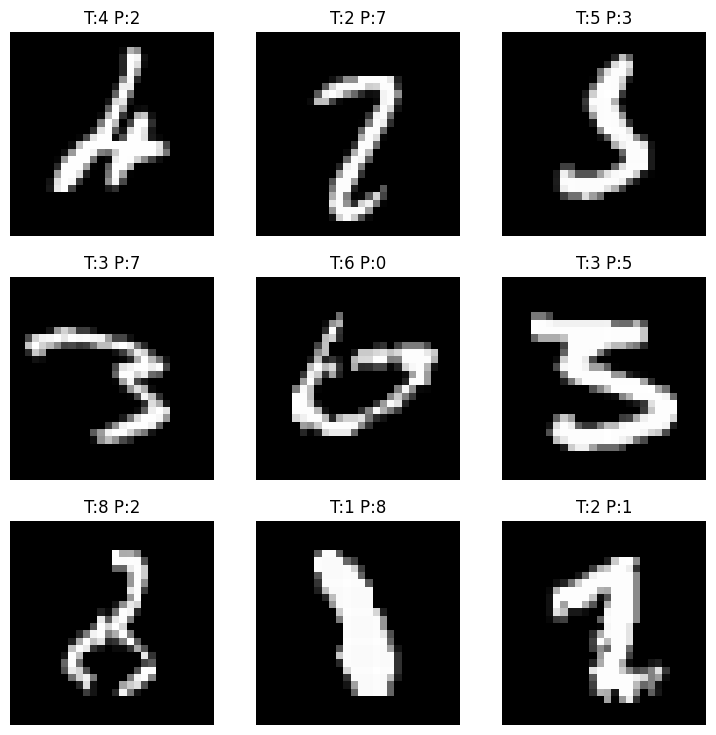

In [ ]:
import numpy as np
mis_idx = np.where(y_pred != y_true)[0]
print("Number of misclassified:", len(mis_idx))

# show first 9 misclassified images
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
for i, idx in enumerate(mis_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"T:{y_true[idx]} P:{y_pred[idx]}")
    plt.axis('off')
plt.show()


In [ ]:
# Save model
model.save("feedforward_mnist.h5")

# Load back
from tensorflow.keras.models import load_model
loaded = load_model("feedforward_mnist.h5")

# Predict single example
import numpy as np
i = 0
sample = x_test_flat[i].reshape(1, -1)
prob = loaded.predict(sample)
pred_label = np.argmax(prob)
print("True:", y_test[i], "Pred:", pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
True: 7 Pred: 7


In [ ]:
def build_deep_dense(input_dim=784, num_classes=10, units=[512,256,128], dropout=0.3, l2_rate=1e-4):
    from tensorflow.keras import layers, models, regularizers
    model = models.Sequential([layers.Input(shape=(input_dim,))])
    for u in units:
        model.add(layers.Dense(u, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

deep_model = build_deep_dense(units=[512, 256, 128], dropout=0.4)
deep_model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
deep_model.summary()

# Train (you can reuse callbacks)
hist_deep = deep_model.fit(x_train_flat, y_train_cat, epochs=40, batch_size=128, validation_split=0.1, callbacks=callbacks, verbose=2)
deep_score = deep_model.evaluate(x_test_flat, y_test_cat, verbose=2)
print("Deep model - loss/acc:", deep_score)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/40

Epoch 1: val_loss did not improve from 0.06951
422/422 - 13s - 31ms/step - accuracy: 0.8659 - loss: 0.5339 - val_accuracy: 0.9662 - val_loss: 0.2130 - learning_rate: 1.0000e-03
Epoch 2/40

Epoch 2: val_loss did not improve from 0.06951
422/422 - 1s - 3ms/step - accuracy: 0.9411 - loss: 0.2944 - val_accuracy: 0.9723 - val_loss: 0.1840 - learning_rate: 1.0000e-03
Epoch 3/40

Epoch 3: val_loss did not improve from 0.06951
422/422 - 3s - 6ms/step - accuracy: 0.9538 - loss: 0.2521 - val_accuracy: 0.9760 - val_loss: 0.1723 - learning_rate: 1.0000e-03
Epoch 4/40

Epoch 4: val_loss did not improve from 0.06951
422/422 - 3s - 6ms/step - accuracy: 0.9601 - loss: 0.2256 - val_accuracy: 0.9778 - val_loss: 0.1716 - learning_rate: 1.0000e-03
Epoch 5/40

Epoch 5: val_loss did not improve from 0.06951
422/422 - 3s - 7ms/step - accuracy: 0.9641 - loss: 0.2120 - val_accuracy: 0.9805 - val_loss: 0.1620 - learning_rate: 1.0000e-03
Epoch 6/40

Epoch 6: val_loss did not improve from 0.06951
422/

In [ ]:
# Replace '/content/data.csv' with path to your CSV in Colab (upload via left pane or drive)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('/content/data.csv')  # <-- change this
# assume 'label' column is the target
if 'label' not in df.columns:
    raise ValueError("CSV must contain a 'label' column")

X = df.drop(columns=['label']).values
y = df['label'].values

# If labels are strings, encode them
le = LabelEncoder()
y_enc = le.fit_transform(y)
num_classes = len(np.unique(y_enc))

# If binary classification:
if num_classes == 2:
    loss = 'binary_crossentropy'
    final_activation = 'sigmoid'
    y_target = y_enc  # shape (n,)
else:
    loss = 'categorical_crossentropy'
    final_activation = 'softmax'
    y_target = to_categorical(y_enc, num_classes)

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=SEED, stratify=y_enc)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Build a simple dense model for tabular data
input_dim = X_train.shape[1]
model_tab = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes if num_classes>2 else 1, activation=final_activation)
])

model_tab.compile(optimizer=Adam(1e-3), loss=loss, metrics=['accuracy'])
model_tab.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=callbacks, verbose=2)


FileNotFoundError: [Errno 2] No such file or directory: '/content/data.csv'

In [ ]:
from tensorflow.keras.datasets import mnist

# This line will automatically download MNIST if it's not already cached
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Flatten: 28x28 -> 784
x_train_flat = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test_flat  = x_test.reshape(-1, 28*28).astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

print("Train shape:", x_train_flat.shape, y_train_cat.shape)
print("Test shape:", x_test_flat.shape, y_test_cat.shape)


Train shape: (60000, 784) (60000, 10)
Test shape: (10000, 784) (10000, 10)


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Input(shape=(784,)),               # 784 inputs
    layers.Dense(128, activation='relu'),     # hidden layer
    layers.Dense(10, activation='softmax')    # output layer (10 digits)
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [ ]:
history = model.fit(x_train_flat, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=2)


Epoch 1/10
422/422 - 9s - 20ms/step - accuracy: 0.8966 - loss: 0.3789 - val_accuracy: 0.9563 - val_loss: 0.1691
Epoch 2/10
422/422 - 2s - 4ms/step - accuracy: 0.9496 - loss: 0.1788 - val_accuracy: 0.9635 - val_loss: 0.1285
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9630 - loss: 0.1309 - val_accuracy: 0.9682 - val_loss: 0.1094
Epoch 4/10
422/422 - 1s - 3ms/step - accuracy: 0.9714 - loss: 0.1016 - val_accuracy: 0.9698 - val_loss: 0.0993
Epoch 5/10
422/422 - 1s - 3ms/step - accuracy: 0.9772 - loss: 0.0815 - val_accuracy: 0.9712 - val_loss: 0.0938
Epoch 6/10
422/422 - 1s - 3ms/step - accuracy: 0.9818 - loss: 0.0668 - val_accuracy: 0.9730 - val_loss: 0.0896
Epoch 7/10
422/422 - 1s - 3ms/step - accuracy: 0.9853 - loss: 0.0556 - val_accuracy: 0.9733 - val_loss: 0.0867
Epoch 8/10
422/422 - 1s - 3ms/step - accuracy: 0.9875 - loss: 0.0465 - val_accuracy: 0.9738 - val_loss: 0.0850
Epoch 9/10
422/422 - 1s - 3ms/step - accuracy: 0.9901 - loss: 0.0392 - val_accuracy: 0.9737 - val_loss: 0.0843


In [ ]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 2s - 6ms/step - accuracy: 0.9756 - loss: 0.0844
Test Accuracy: 0.9756


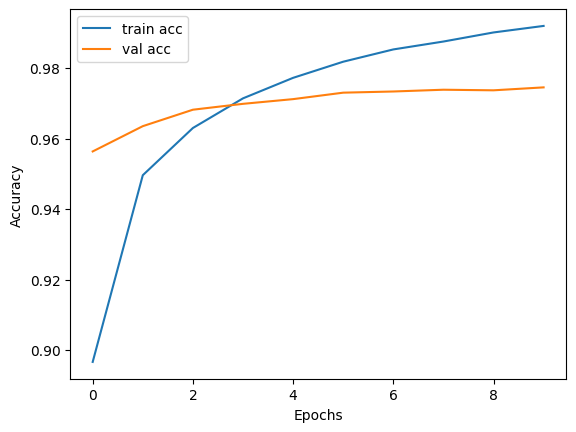

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(); plt.show()
